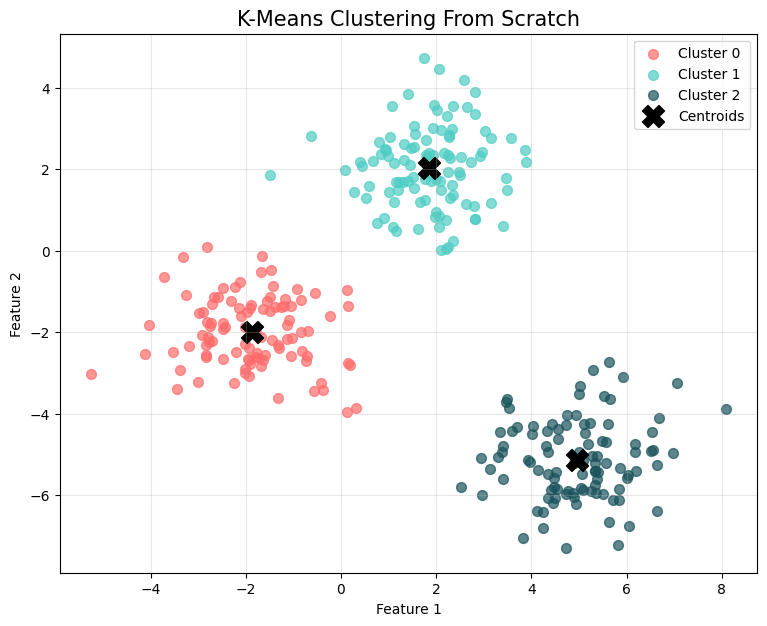

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Sample Data

np.random.seed(42)

X1 = np.random.randn(100, 2) + [2, 2]
X2 = np.random.randn(100, 2) + [-2, -2]
X3 = np.random.randn(100, 2) + [5, -5]

X = np.vstack((X1, X2, X3))

# K-Means Implementation

class KMeans:
    def __init__(self, K=3, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape

        # Randomly initialize centroids
        random_idx = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Compute new centroids
            new_centroids = np.array([
                X[self.labels == k].mean(axis=0)
                for k in range(self.K)
            ])

            # Stop if centroids do not change
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.array([
            np.linalg.norm(X - centroid, axis=1)
            for centroid in self.centroids
        ])
        return np.argmin(distances, axis=0)
    
    def predict(self, X):
        return self._assign_clusters(X)

# Train K-Means
kmeans = KMeans(K=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Beautiful Visualization

plt.figure(figsize=(9,7))

colors = ["#ff6b6b", "#4ecdc4", "#1a535c"]

for k in range(3):
    plt.scatter(
        X[labels == k][:,0],
        X[labels == k][:,1],
        s=50,
        color=colors[k],
        label=f"Cluster {k}",
        alpha=0.7
    )

# Plot centroids
plt.scatter(
    kmeans.centroids[:,0],
    kmeans.centroids[:,1],
    s=250,
    c="black",
    marker="X",
    label="Centroids"
)

plt.title("K-Means Clustering From Scratch", fontsize=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()